In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [4]:
#인코딩시 자동으로 인코딩 감지하여 불러오기
import chardet

with open("/Users/hongminhwa/Desktop/baf/SeoulBikeData.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

data = pd.read_csv("/Users/hongminhwa/Desktop/baf/SeoulBikeData.csv", encoding=result['encoding'])

In [9]:
#원본데이터 복사
data1 = data.copy()

In [23]:
data1

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [12]:
#데이터 보기
data1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [69]:
#중복행 없음
data1[data1.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month


In [18]:
#기술 통계량 확인
data1.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [21]:
data1.shape

(8760, 14)

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [14]:
#결측치만 확인
data1.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Text(0.5, 1.0, 'heatmap corr')

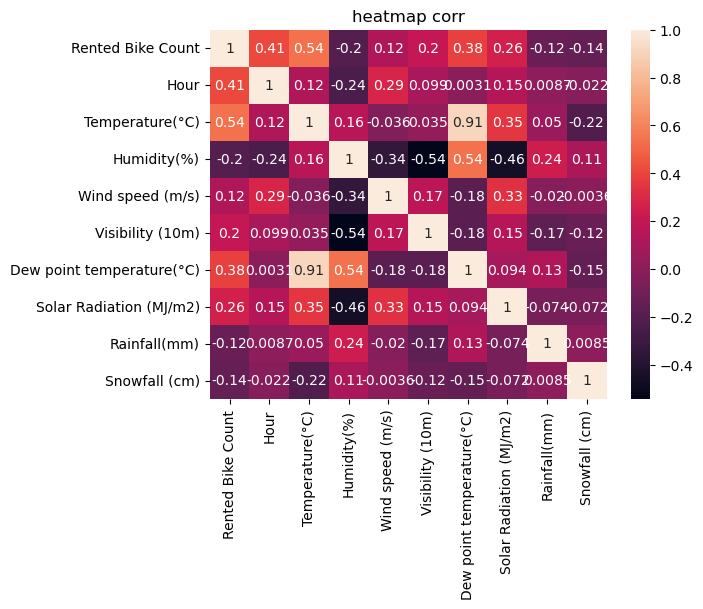

In [95]:
#변수별 상관계수 확인
data_num=data1._get_numeric_data()
sns.heatmap(data_num.corr(),annot=True)
plt.title('heatmap corr')

# Date

In [26]:
# date변수 datetime 형식으로 변경
data1['Date'] = pd.to_datetime(data1['Date'], format='%d/%m/%Y')

# 날짜 데이터의 최솟값과 최댓값
min_date = data1['Date'].min()
max_date = data1['Date'].max()

print(f"날짜의 최솟값: {min_date}")
print(f"날짜의 최댓값: {max_date}")

# 날짜의 기간
date_range = max_date - min_date
print(f"날짜의 기간: {date_range}")

날짜의 최솟값: 2017-12-01 00:00:00
날짜의 최댓값: 2018-11-30 00:00:00
날짜의 기간: 364 days 00:00:00


# Date 변수는 2017-12-01 부터 2018-11-30 까지의 총 364일의 정보가 있다.

# Rented Bike Count

In [15]:
data1['Rented Bike Count'].unique()

array([ 254,  204,  173, ..., 1538,  804,  595])

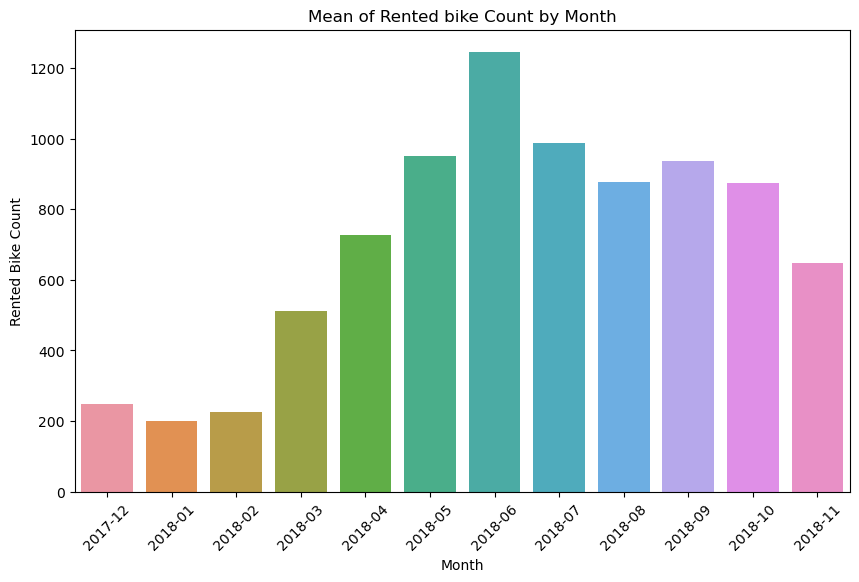

In [31]:
# 월별로 대여횟수의 정보 보기
# Date 열을 월 정보로 변환
data1['Month'] = data1['Date'].dt.to_period('M')

# 월별 자전거 대여 횟수 평균 계산
monthly_avg = data1.groupby('Month')['Rented Bike Count'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Rented Bike Count', data=monthly_avg)
plt.title('Mean of Rented bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.xticks(rotation=45)
plt.show()


## 월별 데이터로, 대여량을 보면, 겨울에는 대여횟수가 매우 낮다, 점점 날씨가 풀리면서, 대여횟수가 늘어나고 있고, 추워지면서 줄어들고 있다.

## 시간대별로도 확인

In [36]:
# 시간대 확인, 0~23시 까지 있음
print(data1["Hour"].unique().min())
print(data1["Hour"].unique().max())

0
23


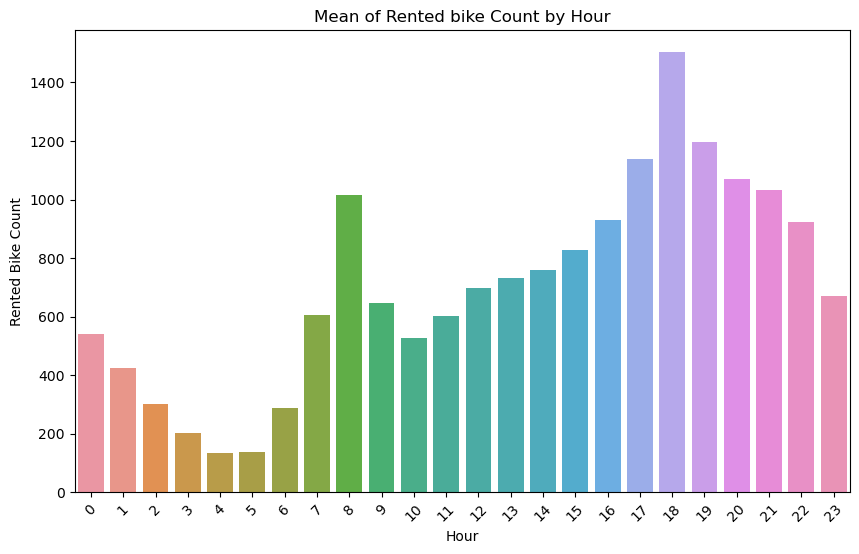

In [37]:
#시간에 따른 평균 대여횟수 확인
#시간대별 자전거 대여 횟수 평균 계산
hour_avg = data1.groupby('Hour')['Rented Bike Count'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=hour_avg)
plt.title('Mean of Rented bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.xticks(rotation=45)
plt.show()


## 새벽 시간대에는 대여 횟수가 점점 줄어들면서, 시간이 갈수록 늘어난다, 출근시간 및 퇴근시간에 가장 대여횟수가 많다

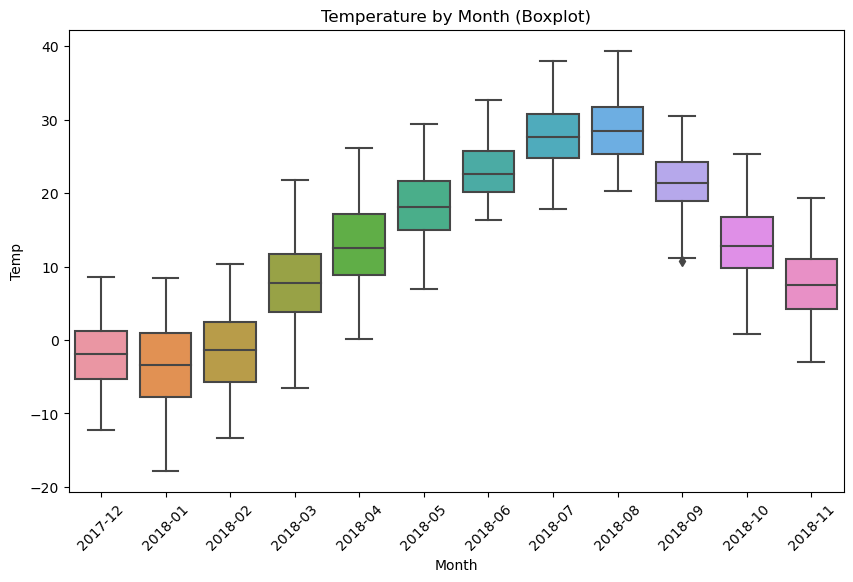

In [40]:
# 월별 기온 정보 

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Temperature(°C)', data=data1)
plt.title('Temperature by Month (Boxplot)')
plt.xlabel('Month')
plt.ylabel('Temp')
plt.xticks(rotation=45)
plt.show()


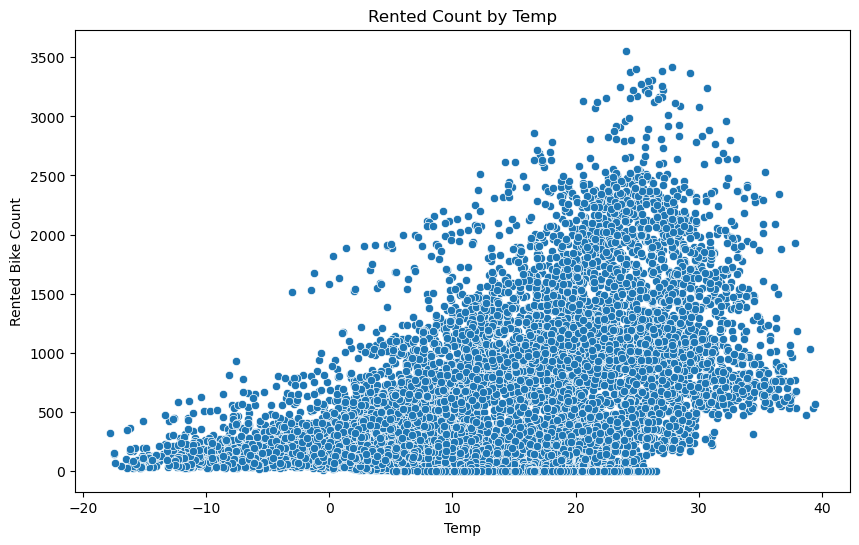

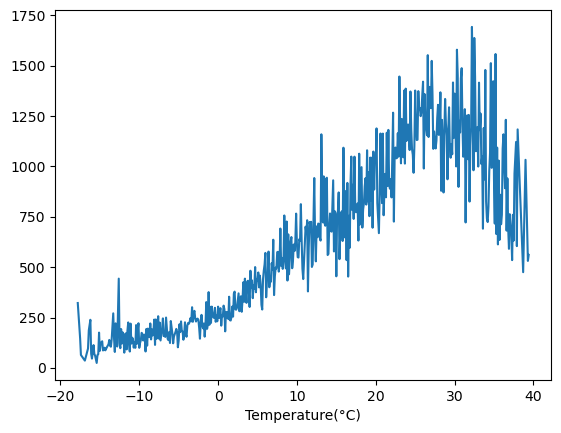

In [96]:
#온도에 따른 대여횟수
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=data1)
plt.title('Rented Count by Temp')
plt.xlabel('Temp')
plt.ylabel('Rented Bike Count')
plt.show()

#온도에 따른 평균 대여횟수
pd.pivot_table(data1,'Rented Bike Count',index=['Temperature(°C)'])

data_temp=data1.groupby(['Temperature(°C)'])['Rented Bike Count'].mean()

data_temp.plot()
plt.show()


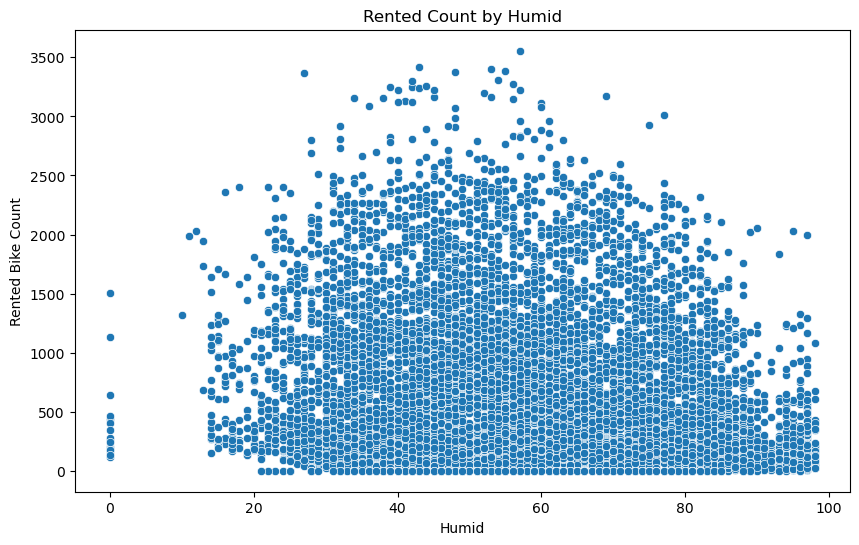

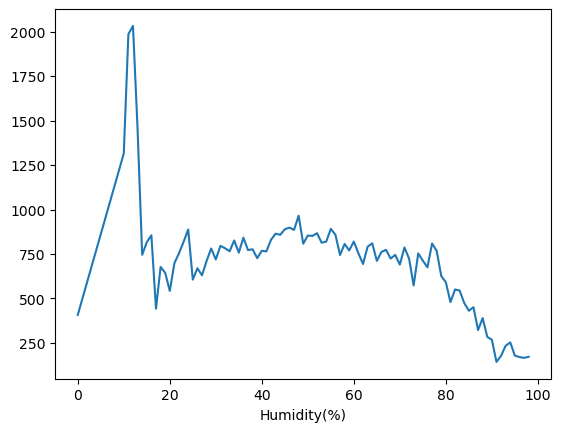

In [48]:
#습도에 따른 대여횟수
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=data1)
plt.title('Rented Count by Humid')
plt.xlabel('Humid')
plt.ylabel('Rented Bike Count')
plt.show()

#습도에 따른 평균 대여횟수
pd.pivot_table(data1,'Rented Bike Count',index=['Humidity(%)'])

data_Humid=data1.groupby(['Humidity(%)'])['Rented Bike Count'].mean()

data_Humid.plot()
plt.show()


In [49]:
data1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12


In [53]:
#Dew point temperature(°C) = 이슬점
#풍속(Wind speed (m/s)), 가시성(Visibility (10m)), 이슬점 (Dew point temperature(°C)) 데이터 보기
print('풍속',data['Wind speed (m/s)'].unique())
print('가시성',data['Visibility (10m)'].unique())
print('이슬점',data['Dew point temperature(°C)'].unique())

풍속 [2.2 0.8 1.  0.9 2.3 1.5 1.3 1.1 0.5 1.2 1.4 1.6 2.  3.2 4.2 1.7 0.6 2.1
 2.5 1.8 2.6 1.9 2.7 3.7 3.4 3.5 4.5 4.1 4.8 5.4 5.8 4.7 5.3 3.9 3.  2.4
 2.8 0.  3.1 2.9 0.7 0.4 3.3 0.3 4.3 4.  3.8 3.6 5.1 4.6 0.1 5.  4.4 4.9
 0.2 6.7 6.  5.2 5.6 7.4 7.2 6.1 7.3 6.9 5.7]
가시성 [2000 1928 1996 ...  220  524 1688]
이슬점 [-17.6 -17.7 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 -21.2 -20.2 -17.2 -15.6
 -14.6 -11.4  -7.   -6.5  -5.   -3.5  -3.6  -3.4  -4.2  -4.9  -6.2  -6.9
  -7.1  -7.3  -7.9  -7.8  -7.7  -4.8  -3.8  -3.3  -4.   -4.6  -4.1  -1.2
   0.   -1.3  -0.8  -0.1   1.2   1.7   2.    2.1   2.7   3.1   3.4   3.7
   3.6   3.8   3.3   3.2   2.6   2.4   2.3   1.3   1.1  -0.5  -2.5  -5.7
 -11.3 -13.  -12.1 -12.9 -15.5 -16.7 -17.8 -18.8 -18.3 -17.3 -15.8 -15.3
 -16.1 -16.9 -18.5 -20.4 -20.9 -20.6 -21.  -20.5 -21.8 -22.  -19.7 -18.2
 -16.  -15.1 -14.4 -13.5 -13.4 -13.3 -12.   -9.4  -6.1  -6.4  -7.2  -7.6
  -7.4  -6.8  -6.   -9.1 -10.3  -8.2  -2.9   0.2   0.3   0.1   0.5   0.4
  -0.7  -1.1  -1.4  -2.8  -2.2 

In [56]:
print('최저 풍속 : ' , data1['Wind speed (m/s)'].min())
print('최고 풍속 : ' , data1['Wind speed (m/s)'].max())
print('최저 가시성 : ' , data1['Visibility (10m)'].min())
print('최고 가시성 : ' , data1['Visibility (10m)'].max())
print('최저 이슬점 : ' , data1['Dew point temperature(°C)'].min())
print('최고 이슬점 : ' , data1['Dew point temperature(°C)'].max())

최저 풍속 :  0.0
최고 풍속 :  7.4
최저 가시성 :  27
최고 가시성 :  2000
최저 이슬점 :  -30.6
최고 이슬점 :  27.2


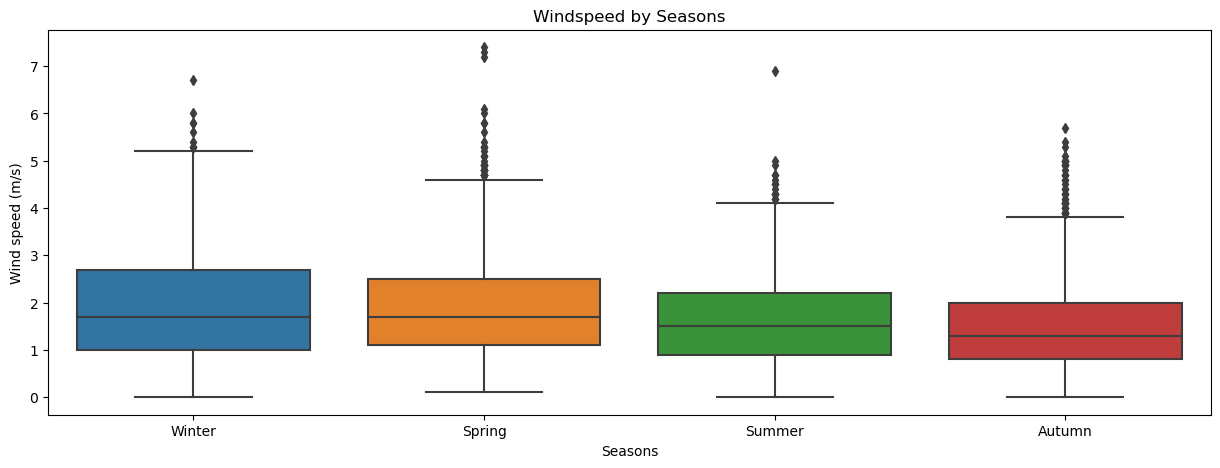

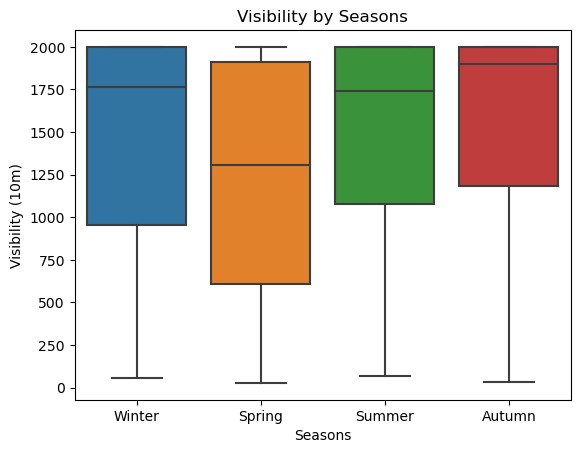

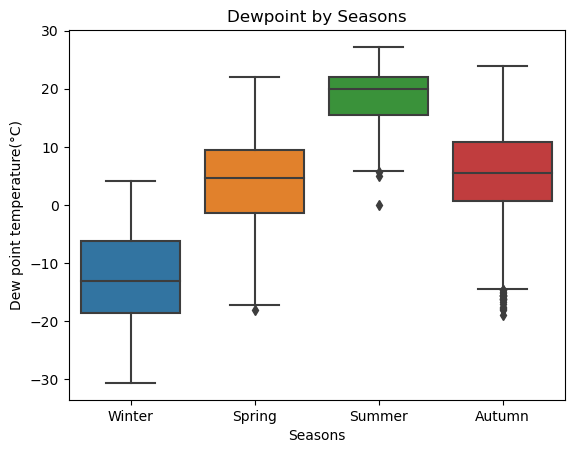

In [62]:
#계절별로 풍속, 가시성, 이슬점 관계 보기

plt.figure(figsize=(15, 5))

# 계절별 풍속 boxplot
sns.boxplot(x='Seasons', y='Wind speed (m/s)', data=data1)
plt.title('Windspeed by Seasons')
plt.show()
# 계절별 가시성 boxplot
sns.boxplot(x='Seasons', y='Visibility (10m)', data=data1)
plt.title('Visibility by Seasons')
plt.show()
# 계절별 이슬점 boxplot
sns.boxplot(x='Seasons', y='Dew point temperature(°C)', data=data1)
plt.title('Dewpoint by Seasons')
plt.show()

# 풍속은 겨울 -> 봄 -> 여름 -> 가을 순이고 
# 가시성은 봄이 가시성이 낮다
# 이슬점은 겨울에 가장 낮으며, 여름에 가장 높다. 이는 이슬점의 원리 때문이고, 강수량, 강설량에도 영향이 있을 것 같다.

In [63]:
data1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12


In [66]:
# Solar Radiation (MJ/m2) = 태양 복사 에너지 
# Rainfall(mm) = 강수량
# Snowfall (cm) = 강설량
print('최저 태복에 : ' , data1['Solar Radiation (MJ/m2)'].min())
print('최고 태복에 : ' , data1['Solar Radiation (MJ/m2)'].max())
print('태양 복사 에너지',data1['Solar Radiation (MJ/m2)'].unique())
print('최저 강수량 : ' , data1['Rainfall(mm)'].min())
print('최고 강수량 : ' , data1['Rainfall(mm)'].max())
print('강수량',data1['Rainfall(mm)'].unique())
print('최저 강설량 : ' , data1['Snowfall (cm)'].min())
print('최고 강설량 : ' , data1['Snowfall (cm)'].max())
print('강설량',data1['Snowfall (cm)'].unique())

최저 태복에 :  0.0
최고 태복에 :  3.52
태양 복사 에너지 [0.   0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24 0.08 0.3  0.8  1.
 1.09 1.12 0.99 0.74 0.22 0.06 0.02 0.25 0.43 0.6  0.69 0.53 0.2  0.05
 0.64 1.17 0.88 0.55 0.18 0.21 0.63 0.93 1.08 1.1  0.96 0.72 0.36 0.1
 0.14 0.41 0.98 1.14 1.04 0.84 0.51 0.15 1.22 0.87 0.56 0.61 0.89 1.05
 1.13 1.06 0.4  0.03 0.28 0.35 0.62 1.26 1.24 0.92 0.58 0.19 1.23 0.13
 0.52 0.48 0.09 0.34 0.42 0.32 0.86 1.07 0.17 0.85 0.47 0.57 0.91 0.71
 0.12 0.67 0.77 0.78 0.16 0.66 0.38 0.11 0.04 0.07 1.18 0.9  0.33 0.75
 0.59 0.29 0.81 0.83 0.39 1.15 1.03 0.95 0.76 1.02 0.26 0.5  0.27 0.73
 0.46 0.31 1.2  1.19 0.45 0.49 0.79 0.44 0.68 1.27 1.25 1.21 0.7  1.28
 1.3  1.29 0.82 1.65 2.04 2.25 2.18 1.91 1.42 1.57 1.99 2.22 2.17 1.89
 1.4  1.73 2.12 2.29 2.23 1.94 1.44 1.72 2.09 2.3  2.24 1.93 1.56 1.97
 2.02 1.87 1.41 1.54 1.9  2.11 1.81 1.37 1.66 1.49 1.75 2.35 1.36 1.43
 2.08 1.55 2.28 2.19 1.96 1.34 1.68 1.84 1.45 1.7  2.01 2.2  1.33 2.46
 2.39 1.63 1.98 1.77 1.38 1.71 2.03 2.21 

In [98]:
data_rain = data1.groupby('Rainfall(mm)')['Rented Bike Count'].mean()

In [99]:
data_snow = data1.groupby('Snowfall (cm)')['Rented Bike Count'].mean()

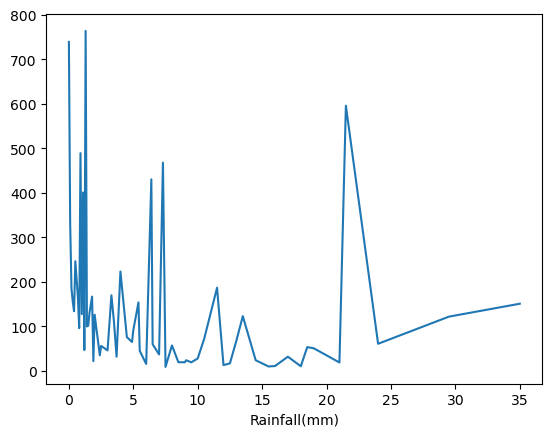

<Axes: xlabel='Snowfall (cm)'>

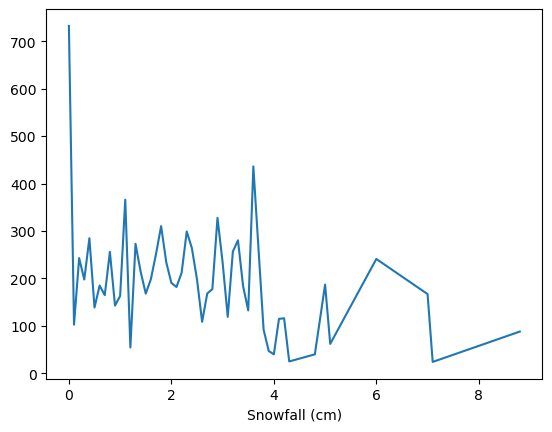

In [103]:
#강우,강설량 별 대여횟수 확인하기
data_rain.plot()
plt.show()
data_snow.plot()

In [75]:
#계절별 대여횟수 총합 
data1.groupby('Seasons')['Rented Bike Count'].sum().sort_values()

Seasons
Winter     487169
Spring    1611909
Autumn    1790002
Summer    2283234
Name: Rented Bike Count, dtype: int64

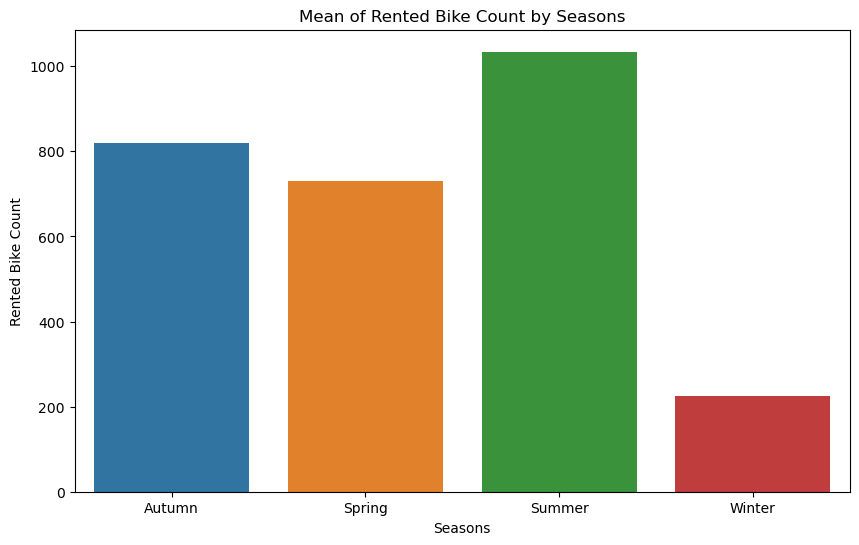

In [71]:
# 계절별 대여횟수 평균 계산
seasonal_avg = data1.groupby('Seasons')['Rented Bike Count'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=seasonal_avg)
plt.title('Mean of Rented Bike Count by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.show()

In [86]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

# Holiday / Functioning Day

In [87]:
pd.crosstab(index=data1['Holiday'], columns='count')

col_0,count
Holiday,
Holiday,432
No Holiday,8328


In [88]:
pd.crosstab(index=data1['Functioning Day'], columns='count')

col_0,count
Functioning Day,
No,295
Yes,8465


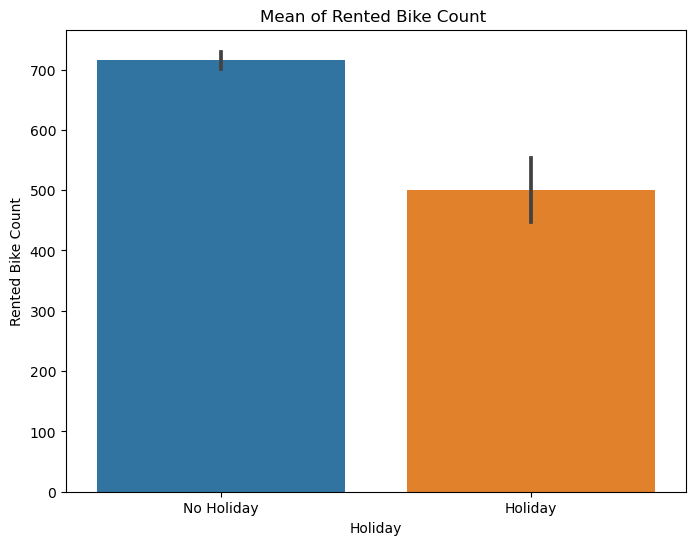

In [92]:
# 공휴일 여부에 따른 대여횟수 평균
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=data1)
plt.title('Mean of Rented Bike Count ')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()